In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
#Reading the nyc taxi trip duration file
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [3]:
#seperate features and target
features = df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1)
target = df["trip_duration"]

In [4]:
df1= pd.get_dummies(df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1))
df1.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,1,0


In [5]:
#seperate features and target
x = df1
y = df["trip_duration"]
x.shape,y.shape

((729322, 7), (729322,))

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

# 4.Linear Regression model

In [7]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [8]:
#creating an instance of LR
lr = LR()
#fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [23]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  4084.314901285898


In [22]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  3082.700937344297


In [11]:
#computing the coefficients of above model
lr.coef_

array([   39.46800108,  2601.42057522, -3401.4591546 ,  -921.73043757,
       -1671.91286452,   -59.48931509,    59.48931509])

# plotting the coefficients

Text(0.5, 1.0, 'coefficient plot')

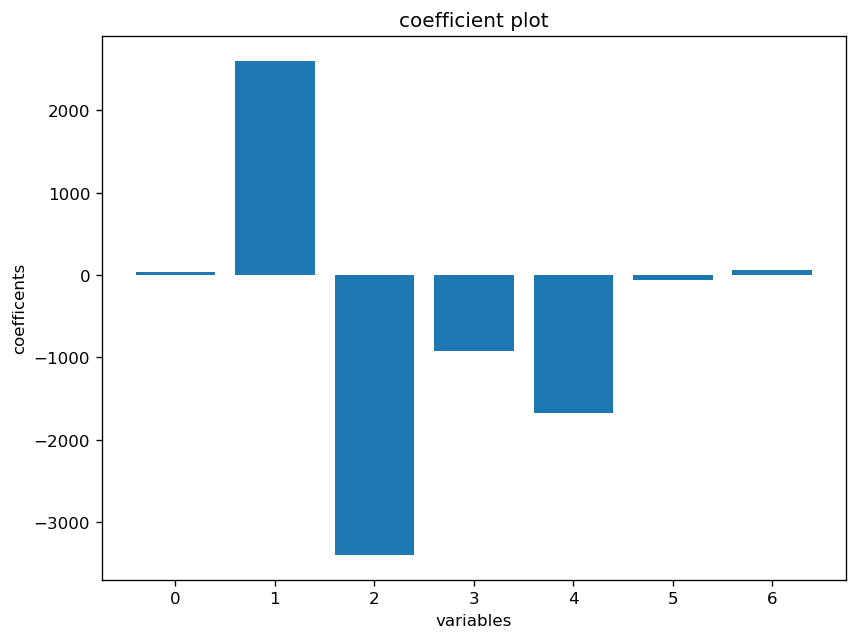

In [12]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficents")
plt.title("coefficient plot")

Here we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled.

In [13]:
#calculating the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
14908,2406,759.376620,1646.623380
87154,1457,822.601623,634.398377
666581,163,876.430490,-713.430490
543467,2160,1257.688397,902.311603
105193,402,842.841662,-440.841662


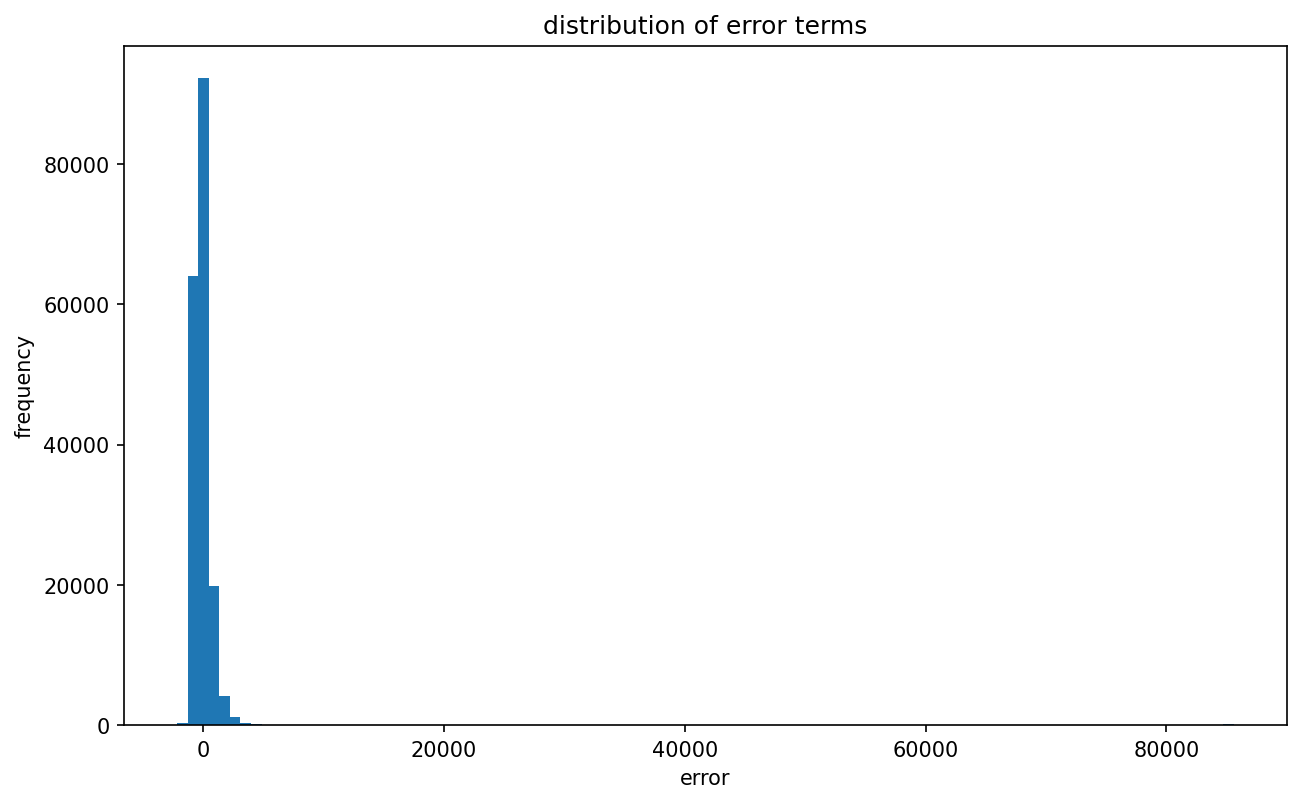

In [29]:
plt.figure(figsize=(10,6),dpi=150,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=100)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("distribution of error terms")
plt.show()

C:\Users\kwali\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


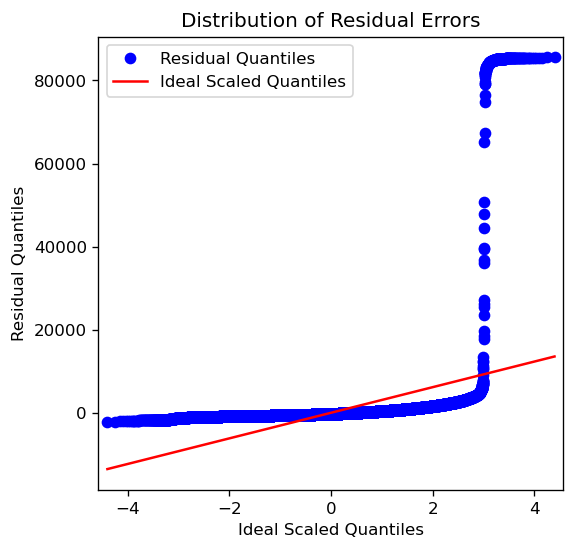

In [28]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [15]:
#computing the train score 
linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

0.2811106281771725

In [16]:
#computing the test score
linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

0.5463483862958252

In [20]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store linear_test_score

Stored 'linear_test_score' (float64)


In [21]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store linear_train_score

Stored 'linear_train_score' (float64)


# conclusions

1. The training and test RMSE has a huge difference as the training rmse is 4084.31 and testing rmse is 3082.700
2. On computing the coefficients we observed that there are some negative values as well
3. On plotting the coefficients we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled.
4. On plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles
5. The train score of linear model is very low as compared to other models. It just 0.28%
6. The test score of linear model is also very low as compared to other models. It is just 0.54%